# TOC

 - [0 - Simple Example](0-simple-example.ipynb)
 - [1 - Simple Example Symbolic](1-simple-example-symblic.ipynb)

In [2]:
import astunparse

from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.dnf import reduce_to_dnf
from moa.onf import reduce_to_onf
from moa.backend import generate_python_source

# Frontend

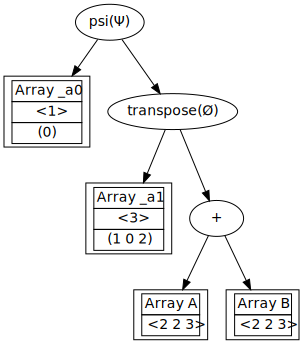

In [3]:
symbol_table, tree = parse('<0> psi (<1 0 2> tran(A ^ <2 2 3> + B ^ <2 2 3>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

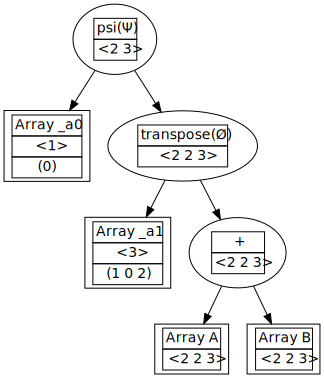

In [5]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction to Denotational Normalized Format (DNF)

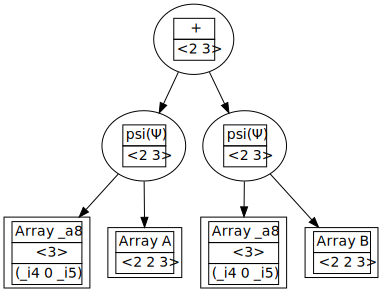

In [6]:
dnf_symbol_table, dnf_tree = reduce_to_dnf(shape_symbol_table, shape_tree)
visualize_ast(dnf_symbol_table, dnf_tree)

# Reduction to ONF

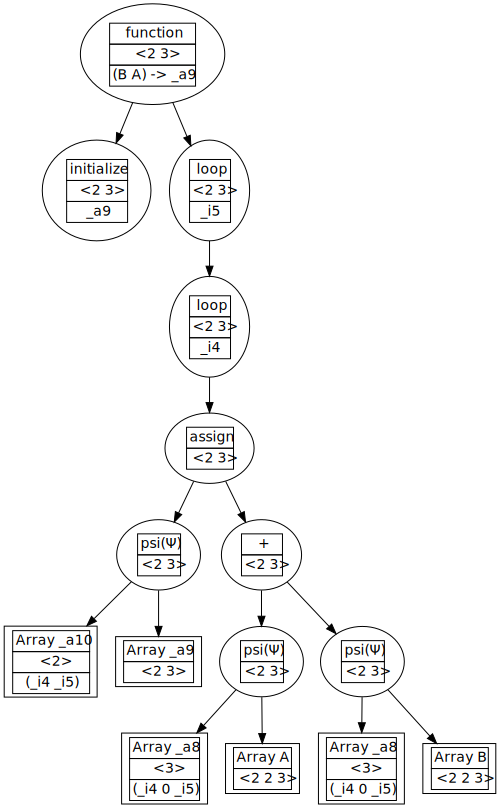

In [7]:
onf_symbol_table, onf_tree = reduce_to_onf(dnf_symbol_table, dnf_tree)
visualize_ast(onf_symbol_table, onf_tree)

# Backend (Python)

Execute generated python source.

Condition statements are not rendered yet to python source.

In [8]:
source = generate_python_source(onf_symbol_table, onf_tree, materialize_scalars=True)
print(source)



def f(B, A):
    
    _a9 = Array((2, 3))
    
    for _i5 in range(0, 3):
        
        for _i4 in range(0, 2):
            
            _a9[(_i4, _i5)] = (A[(_i4, 0, _i5)] + B[(_i4, 0, _i5)])
    return _a9


In [9]:
exec(source)

In [10]:
from moa.array import Array

In [12]:
A = Array((2, 2, 3), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
B = Array((2, 2, 3), (13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

array = f(B, A)

In [13]:
array.shape

(2, 3)

In [14]:
array.value

[14, 16, 18, 26, 28, 30]